In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from keras.applications.resnet import preprocess_input,decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.applications.resnet import ResNet50
from keras.models import Sequential,Model


In [2]:
height,width=(224,224)
batch_size=32
training_data=r'flowers/Processed_Data/train/'
validation_data=r'flowers/Processed_Data/val/'
test_data=r'flowers/Processed_Data/test/'

In [25]:
train_dataGenerator=ImageDataGenerator(preprocessing_function=preprocess_input,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       validation_split=0.4
)

train_generator=train_dataGenerator.flow_from_directory(training_data,
                                                       target_size=(height,width),
                                                       batch_size=batch_size,
                                                       class_mode='categorical',
                                                       subset='training',
                                                       )
validation_generator=train_dataGenerator.flow_from_directory(validation_data,
                                                            target_size=(height,width),
                                                            batch_size=batch_size,
                                                            class_mode='categorical',
                                                            subset='validation')

test_generator=train_dataGenerator.flow_from_directory(test_data,
                                  target_size=(height,width),
                                  batch_size=1,
                                  class_mode='categorical',
                                  subset='validation')

Found 1554 images belonging to 5 classes.
Found 342 images belonging to 5 classes.
Found 346 images belonging to 5 classes.


In [105]:
x,y=test_generator.next()
y.shape

(1, 5)

In [22]:
model=ResNet50(include_top=False,weights='imagenet')
x=model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
prediction=Dense(train_generator.num_classes,activation='softmax')(x)
neuron_model=Model(inputs=model.inputs,outputs=prediction)

for layer in model.layers:
    layer.trainable=False

    
neuron_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
neuron_model.fit(train_generator,epochs=10)


Epoch 1/10
49/49 [==============================] - 285s 6s/step - loss: 0.7743 - accuracy: 0.7638
Epoch 2/10
49/49 [==============================] - 243s 5s/step - loss: 0.2347 - accuracy: 0.9163
Epoch 3/10
49/49 [==============================] - 246s 5s/step - loss: 0.1774 - accuracy: 0.9311
Epoch 4/10
49/49 [==============================] - 263s 5s/step - loss: 0.1417 - accuracy: 0.9511
Epoch 5/10
49/49 [==============================] - 250s 5s/step - loss: 0.1075 - accuracy: 0.9595
Epoch 6/10
49/49 [==============================] - 240s 5s/step - loss: 0.0794 - accuracy: 0.9730
Epoch 7/10
49/49 [==============================] - 243s 5s/step - loss: 0.0541 - accuracy: 0.9833
Epoch 8/10
49/49 [==============================] - 245s 5s/step - loss: 0.0650 - accuracy: 0.9762
Epoch 9/10
49/49 [==============================] - 242s 5s/step - loss: 0.0714 - accuracy: 0.9775
Epoch 10/10
49/49 [==============================] - 242s 5s/step - loss: 0.0319 - accuracy: 0.9929


In [39]:
classes_name=train_generator.class_indices.keys()
len(classes_name)

5

In [41]:
#Resnet
resnet_model=Sequential()
pretrained_model=ResNet50(include_top=False,input_shape=(224,224,3),pooling='avg',classes=5,weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable=False
resnet_model.add(pretrained_model)  

#Dense
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(5,activation='softmax'))




In [44]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 2565      
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [42]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [45]:
History=resnet_model.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
49/49 [==============================] - 332s 7s/step - loss: 0.6732 - accuracy: 0.7889 - val_loss: 0.4552 - val_accuracy: 0.8450
Epoch 2/10
49/49 [==============================] - 301s 6s/step - loss: 0.2389 - accuracy: 0.9215 - val_loss: 0.4541 - val_accuracy: 0.8480
Epoch 3/10
49/49 [==============================] - 302s 6s/step - loss: 0.2018 - accuracy: 0.9241 - val_loss: 0.5272 - val_accuracy: 0.8450
Epoch 4/10
49/49 [==============================] - 306s 6s/step - loss: 0.1265 - accuracy: 0.9550 - val_loss: 0.5212 - val_accuracy: 0.8567
Epoch 5/10
49/49 [==============================] - 303s 6s/step - loss: 0.1100 - accuracy: 0.9562 - val_loss: 0.4915 - val_accuracy: 0.8538
Epoch 6/10
49/49 [==============================] - 297s 6s/step - loss: 0.0991 - accuracy: 0.9646 - val_loss: 0.4882 - val_accuracy: 0.8684
Epoch 7/10
49/49 [==============================] - 305s 6s/step - loss: 0.0601 - accuracy: 0.9813 - val_loss: 0.6316 - val_accuracy: 0.8333
Epoch 8/10
49

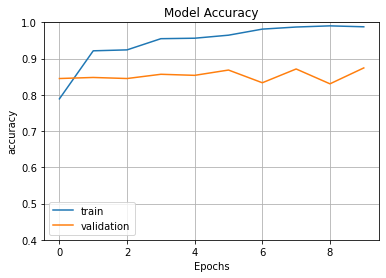

In [50]:
figure1=plt.gcf()
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()


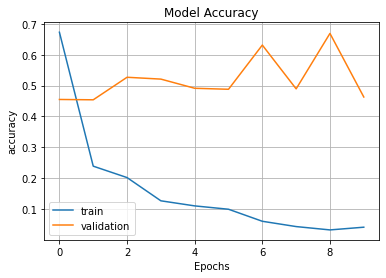

In [52]:
figure1=plt.gcf()
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
#plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()


In [58]:
test_loss,test_acc=resnet_model.evaluate(test_generator)
print('Test accuracy',test_acc)

346/346 [==============================] - 88s 253ms/step - loss: 0.3956 - accuracy: 0.8988
Test accuracy 0.8988439440727234


In [65]:
resnet_model.predict(test_generator[1])

ValueError: in user code:

    C:\Users\hp\Documents\Tensorflow\tfod\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\hp\Documents\Tensorflow\tfod\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\hp\Documents\Tensorflow\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\hp\Documents\Tensorflow\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\hp\Documents\Tensorflow\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\hp\Documents\Tensorflow\tfod\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\hp\Documents\Tensorflow\tfod\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\hp\Documents\Tensorflow\tfod\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\hp\Documents\Tensorflow\tfod\lib\site-packages\keras\engine\input_spec.py:202 assert_input_compatibility
        ' input tensors. Inputs received: ' + str(inputs))

    ValueError: Layer sequential_1 expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 224, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 5) dtype=float32>]


In [111]:
classes=list(classes_name)

In [112]:
classes[np.argmax(resnet_model.predict(x))]

'dandelion'

In [113]:
classes[np.argmax(y)]

'dandelion'

In [114]:
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']